## CNN LSTM - With RDA data representation approach *Angle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, TimeDistributed, Flatten
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
to_store_path = r'D:\2 Thesis\2 models\2023.07.02 all models\CNN LSTM_02\prediction csv\v1_cnn lstm_pred_output_rr_angle.csv'

In [37]:
# X_train = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\1 train\data_2019_train_X_v8_out.npy')
# Y_train_angle =np.load(r'D:\2 Thesis\1 train datasets\2 train rda\1 train\data_2019_train_Y_v8_rr_angle_out.npy')

# X_val = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\2 val\data_2019_11_X.npy')
# Y_val_angle = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\2 val\data_2019_11_Y_array_rr_angle_m.npy')

X_test = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\3 test\data_2019_12_X.npy')
Y_test_angle = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\3 test\data_2019_12_Y_array_rr_angle_m.npy')


In [48]:
## Checkpoint save - relative angle
checkpoint_filepath_angle = r'D:\2 Thesis\2 models\2023.07.02 all models\CNN LSTM_02\best model rda ds\cnn lstm_rr_angle_best_model_v2.h5'

In [6]:
X_train = X_train.astype("float32") 
Y_train_angle = Y_train_angle.astype("float32") 


X_val = X_val.astype("float32") 
Y_val_angle = Y_val_angle.astype("float32") 


In [7]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


In [8]:
train_gen_angle = DataGenerator(X_train, Y_train_angle, 200)
val_gen_angle = DataGenerator(X_val, Y_val_angle, 200)

In [3]:
# Define the cnn lstm model
def cnn_lstm_model(n_steps_input ,n_steps_output,n_features):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(n_steps_input,n_features)))
    model.add(LSTM(74, activation="tanh", input_shape=(n_steps_input, n_features), return_sequences=True))
    model.add(LSTM(74, activation="tanh", return_sequences=True))
    model.add(Dense(2))
    return model

model_rel_angle = cnn_lstm_model(n_steps_input = 10, n_steps_output = 10  , n_features = 8 )
model_rel_angle.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             800       
                                                                 
 lstm_2 (LSTM)               (None, 8, 74)             31672     
                                                                 
 lstm_3 (LSTM)               (None, 8, 74)             44104     
                                                                 
 dense_1 (Dense)             (None, 8, 2)              150       
                                                                 
Total params: 76,726
Trainable params: 76,726
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
model_rel_angle.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'mean_squared_error', metrics=['mae'] )

checkpoint_rel_angle = ModelCheckpoint(checkpoint_filepath_angle, monitor='val_loss', save_best_only=True, mode='min')
# Train the model
history_angle = model_rel_angle.fit(train_gen_angle, validation_data = val_gen_angle, epochs=20, verbose=1, callbacks = [checkpoint_rel_angle])   


Epoch 1/20
54621/54621 [==============================] - 740s 14ms/step - loss: 0.0393 - mae: 0.0827 - val_loss: 0.0388 - val_mae: 0.0799
Epoch 2/20
54621/54621 [==============================] - 765s 14ms/step - loss: 0.0392 - mae: 0.0825 - val_loss: 0.0390 - val_mae: 0.0787
Epoch 3/20
54621/54621 [==============================] - 723s 13ms/step - loss: 0.0391 - mae: 0.0823 - val_loss: 0.0385 - val_mae: 0.0803
Epoch 4/20
 1437/54621 [..............................] - ETA: 11:04 - loss: 0.0424 - mae: 0.0883

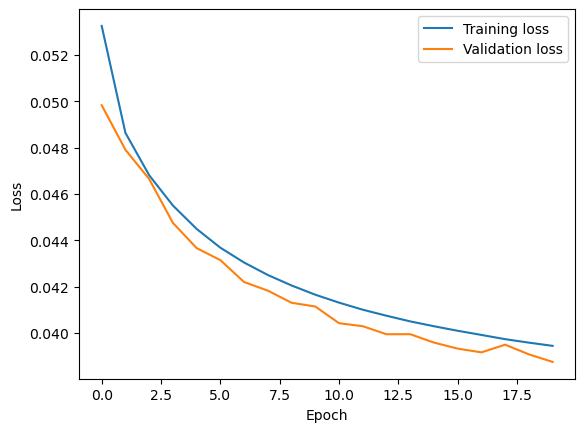

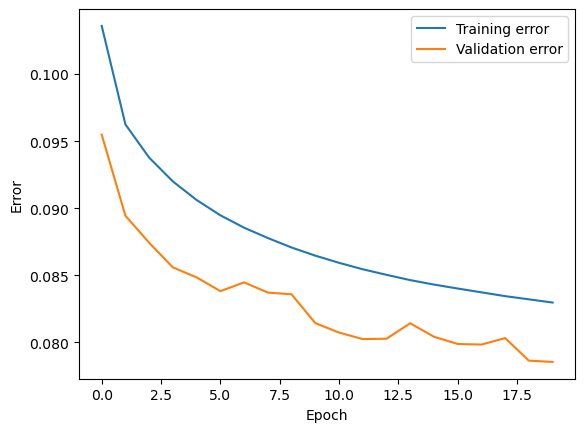

In [34]:
# Plot the training and validation loss
plt.plot(history_angle.history['loss'], label='Training loss')
plt.plot(history_angle.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation error
plt.plot(history_angle.history['mae'], label='Training error')
plt.plot(history_angle.history['val_mae'], label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [38]:
best_model_angle = load_model(checkpoint_filepath_angle)

In [39]:
# Evaluate the model
Y_test_pred_angle = best_model_angle.predict(X_test)

28322/28322 [==============================] - 139s 5ms/step


In [40]:
Y_test_angle = Y_test_angle.squeeze()

In [42]:
Y_test_pred_angle.shape

(906289, 10, 2)

In [43]:
# Calculate the mean squared error
mse_rel_angle = np.mean(np.square(Y_test_angle - Y_test_pred_angle))
print("Mean Squared Error of test_pred_relative angle is :", mse_rel_angle)

Mean Squared Error of test_pred_relative angle is : 0.032755565201091165


In [44]:

# Reshape the array to (9062890, 2)
Y_test_pred_angle_arr = np.reshape(Y_test_pred_angle, (9062890, 2))
Y_test_angle_arr = np.reshape(Y_test_angle, (9062890, 2))

# Create a DataFrame with column names
Y_test_pred_angle_df = pd.DataFrame(Y_test_pred_angle_arr, columns=["sin_rangle_pred", "cos_rangle_pred"])
Y_test_angle_df = pd.DataFrame(Y_test_angle_arr, columns=["sin_rangle", "cos_rangle"])
# Print the DataFrame


In [45]:
Y_test_angle_all_df = pd.concat([Y_test_pred_angle_df, Y_test_angle_df], axis=1)

In [47]:
Y_test_angle_all_df.to_csv(to_store_path)
